# Contributors
### Omar Morshdy  211001749
### Omar Shehata  222000109
### Ahmed Kamal   211000202
### Dima Mohamed  211000081
### Ahmad Mustafa 202001536


# competition link
https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer/data

### Import all need libraries

In [85]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
import os

ModuleNotFoundError: No module named 'dlib'

### check classes

In [2]:
train_path = 'data/train/'

num_classes = 0
class_lables = []
for filename in os.listdir(train_path):
    num_classes += 1
    class_lables.append(filename)

print("Number of classes: ", num_classes)
print(class_lables)


Number of classes:  7
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


### Data Visualization

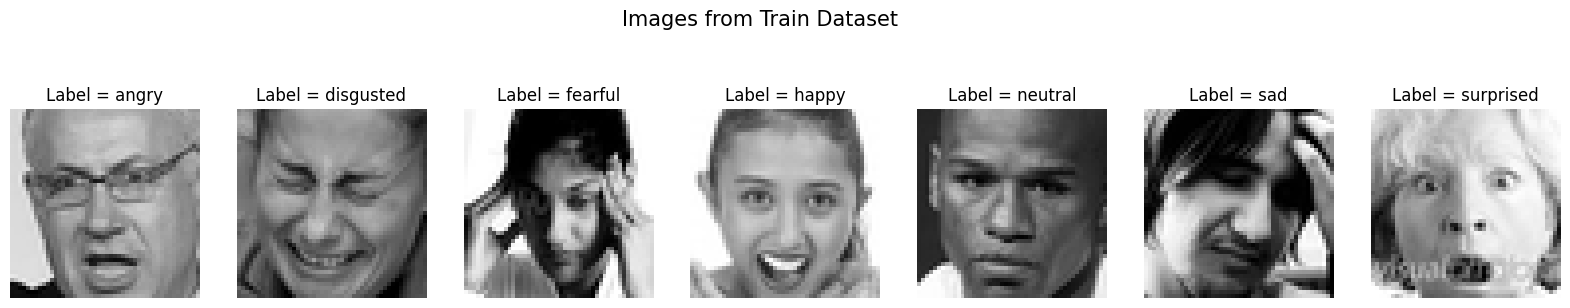

In [3]:
fig, axes = plt.subplots(1, 7, figsize=(20, 4))
fig.suptitle('Images from Train Dataset', fontsize=15)

axes = axes.flatten()

for i, label in enumerate(os.listdir(train_path)):
    if i == len(axes):
        break
    
    label_path = os.path.join(train_path, label)
    
    if os.path.isdir(label_path):
        img_file = [f for f in os.listdir(label_path) if f.lower().endswith(('.png'))]
        
        if img_file:
            random_img = random.choice(img_file)
            
            img_path = os.path.join(label_path, random_img)
            
            img = cv2.imread(img_path)
            
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f"Label = {label}")
            axes[i].axis('off')

plt.show()

### Load Images

In [587]:
train_image = []
train_lables = []

for label in class_lables:
    label_path = os.path.join(train_path, label)
    for img_path in os.listdir(label_path):
        img = cv2.imread(os.path.join(label_path, img_path))
        img_gray = rgb2gray(img)
        img_gray = cv2.resize(img_gray, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)
        img_gray = (img_gray - np.min(img_gray)) / (np.max(img_gray) - np.min(img_gray)) * 255
        img_gray = img_gray.astype(np.uint8)
        img_gray = cv2.equalizeHist(img_gray)
        train_image.append(img_gray)
        train_lables.append(label)


C:\Users\aymanmorshdy\AppData\Local\Temp\ipykernel_27548\1954896034.py:10: RuntimeWarning: invalid value encountered in divide
  img_gray = (img_gray - np.min(img_gray)) / (np.max(img_gray) - np.min(img_gray)) * 255
C:\Users\aymanmorshdy\AppData\Local\Temp\ipykernel_27548\1954896034.py:11: RuntimeWarning: invalid value encountered in cast
  img_gray = img_gray.astype(np.uint8)


In [220]:
img = cv2.imread("HappyImage.png")
img_gray = rgb2gray(img);

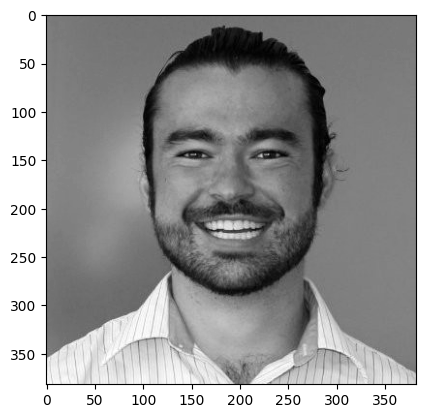

In [221]:
plt.imshow(img_gray, cmap='gray');

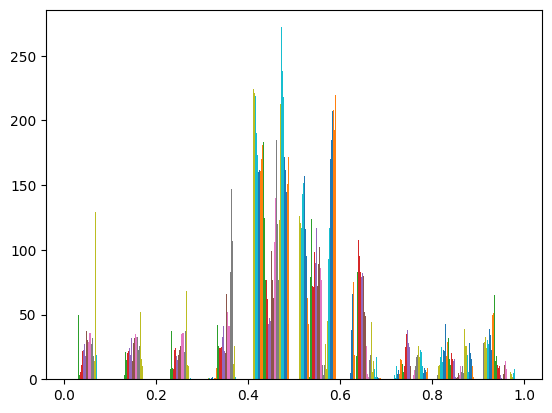

In [222]:
plt.hist(img_gray)
plt.show()

In [223]:
img_gray = cv2.resize(img_gray, None, fx=1, fy=1, interpolation=cv2.INTER_CUBIC)
img_gray = (img_gray - np.min(img_gray)) / (np.max(img_gray) - np.min(img_gray)) * 255
img_gray = img_gray.astype(np.uint8)
img_gray = cv2.equalizeHist(img_gray)

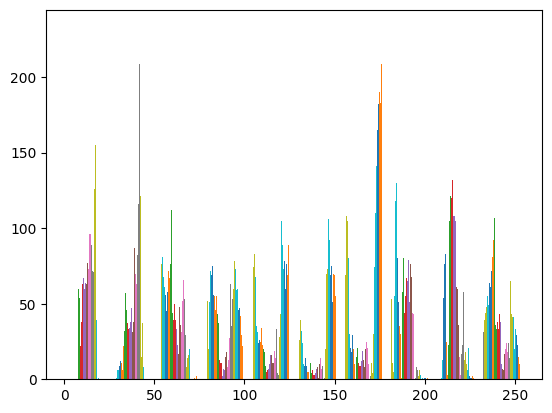

In [224]:
plt.hist(img_gray)
plt.show()

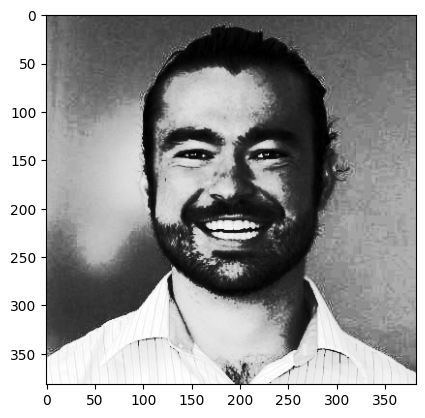

In [225]:
plt.imshow(img_gray, cmap='gray')
plt.show()

## Face and Eye Detection using HAAR Cascade Classifiers

In [226]:
# face_classifier = cv2.CascadeClassifier(r"C:\Python310\Lib\site-packages\cv2\data\haarcascade_lefteye_2splits.xml")
face_classifier = cv2.CascadeClassifier(r"C:\Python310\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml")
# face_classifier = cv2.CascadeClassifier(r"C:\Python310\Lib\site-packages\cv2\data\haarcascade_smile.xml")
face_classifier = cv2.CascadeClassifier(r"C:\Python310\Lib\site-packages\cv2\data\haarcascade_mcs_mouth.xml")
# 


In [227]:
# image = cv2.imread('image3.jpeg')
# image = rgb2gray(image)
# image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
# image = image.astype(np.uint8)
image = img_gray

In [228]:
print("Image type:", image.dtype)
print("Image depth:", image.ndim)
image.shape

Image type: uint8
Image depth: 2


(382, 382)

In [229]:
face_classifier

< cv2.CascadeClassifier 000002D00C9680D0>

In [230]:
if face_classifier.empty():
    print("Not download")
else:
    faces = face_classifier.detectMultiScale(image, 1.1, 5, minSize=(30,30), flags=cv2.CASCADE_SCALE_IMAGE)

[[152 201  83  50]
 [200 132  63  38]
 [114 122  76  46]
 [135 231 129  77]]


<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\aymanmorshdy\AppData\Local\Temp\ipykernel_2676\1146809566.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


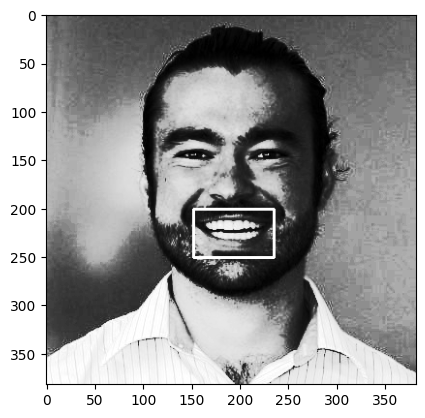

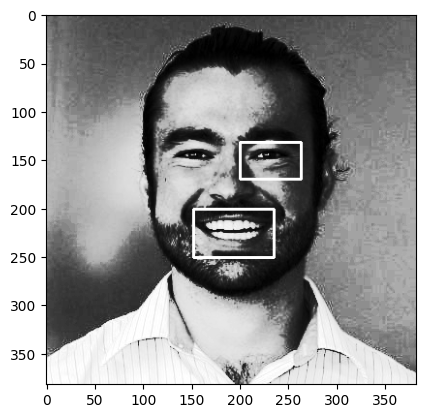

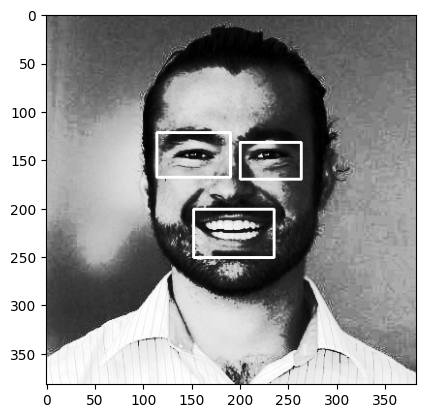

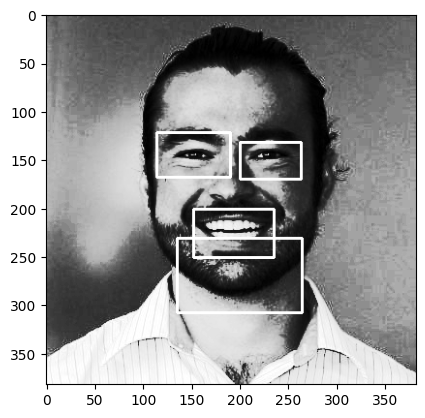

In [231]:
print(faces)
if faces is ():
    print("No faces found")

# print(faces[0][0], " ", faces[0][0]+faces[0][2], " ", faces[0,1], " ", faces[0][1] + faces[0][3])

cropface = image[faces[0][1]:(faces[0][1]+faces[0][3]) , faces[0][0]:(faces[0][0] + faces[0][2]) ]

for (x,y,w,h) in faces:
    
    cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
    plt.imshow(image, cmap='gray')
    plt.show()

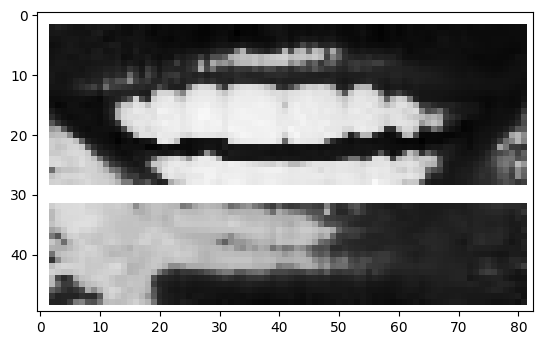

In [232]:
plt.imshow(cropface, cmap='gray')
plt.show()

### apply thresholding to convert grayscale to binary image

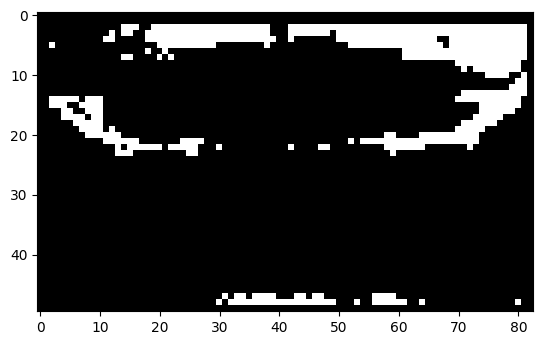

In [233]:
ret, thresh = cv2.threshold(cropface, 20, 255,0)
plt.imshow(thresh, cmap='binary')
plt.show()

In [234]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

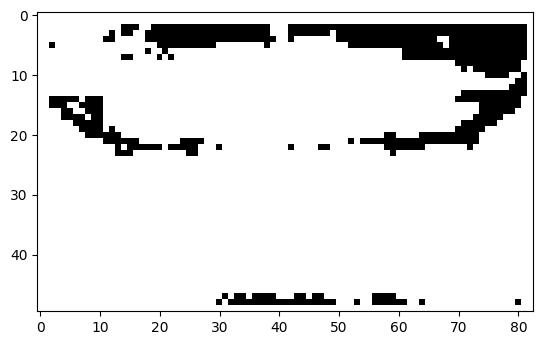

In [235]:
comp = 255-thresh
plt.imshow(comp, cmap='binary')
plt.show()

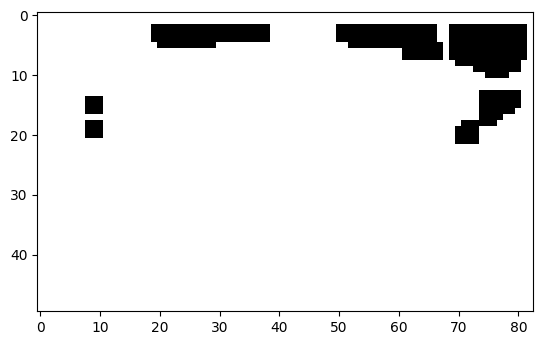

In [236]:
# kernelSizes = [(3, 3), (5, 5), (7, 7)]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(comp, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='binary')
plt.show();

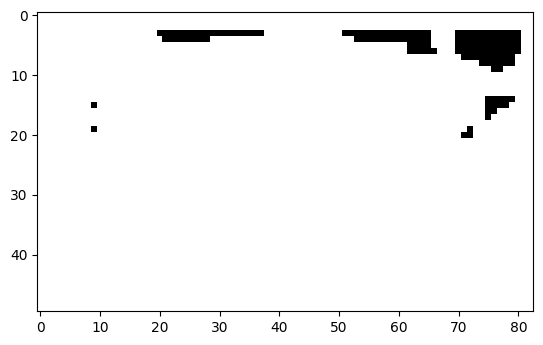

In [237]:
erosion = cv2.erode(comp, None, 3+1)
plt.imshow(erosion, cmap='binary')
plt.show();

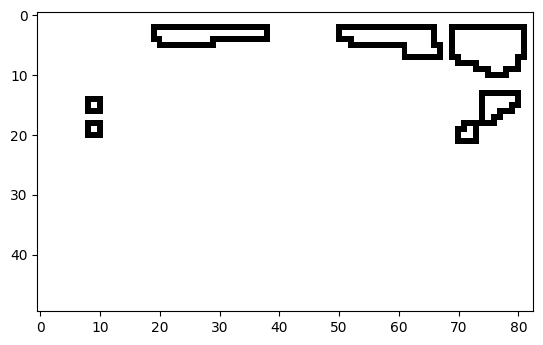

In [238]:
BE = erosion - opening
plt.imshow(BE, cmap='binary')
plt.show()

## Mouth eye

In [239]:
mouth_classifier = cv2.CascadeClassifier(r"C:\Python310\Lib\site-packages\cv2\data\haarcascade_mcs_mouth.xml")

In [240]:
if mouth_classifier.empty():
    print("Not download")
else:
    mouthes = mouth_classifier.detectMultiScale(cropface, 1.1, 4, minSize=(39,50))

In [241]:
print(mouthes)
if mouthes is ():
    print("No faces found")


for (x,y,w,h) in mouthes:
    cv2.rectangle(cropface, (x,y), (x+w, y+h), (255,0,0), 2)
    plt.imshow(cropface, cmap='gray')
    plt.show()

()
No faces found


<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\aymanmorshdy\AppData\Local\Temp\ipykernel_2676\2309927894.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if mouthes is ():
